## 🚀 Compare speed of Distance Functions 🚀

In [1]:
%matplotlib inline
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")

In [2]:
from task import (
    distance_l2_CUPY,
    distance_l2_triton,
    distance_l2_cpu,
    distance_manhattan_CUPY,
    distance_l1_triton,
    distance_manhattan_cpu,
    distance_cosine_CUPY,
    distance_cosine_triton,
    distance_cosine_cpu,
    distance_dot_CUPY,
    distance_dot_triton,
    distance_dot_cpu,
    test_distance_wrapper
)
import numpy as np
import seaborn as sns

In [3]:
np.random.seed(1967)
vector_sizes = [2**i for i in range(1, 27)]
X_array = [np.random.rand(size,) for size in vector_sizes]
Y_array = [np.random.rand(size,) for size in vector_sizes]

In [4]:
functions = {
    "L2 functions": [
        distance_l2_CUPY,
        distance_l2_triton,
        distance_l2_cpu,
    ],
    "L1 functions": [
        distance_manhattan_CUPY,
        distance_l1_triton,
        distance_manhattan_cpu,
    ],
    "Cosine functions": [
        distance_cosine_CUPY,
        distance_cosine_triton,
        distance_cosine_cpu,
    ],
    "Dot functions": [
        distance_dot_CUPY,
        distance_dot_triton,
        distance_dot_cpu,
    ],
}

In [5]:
results_list = {}
for function_type, function_list in functions.items():
    results_list[function_type]= []
    for function in function_list:
        inner_results_item = []
        for i in range(len(vector_sizes)):
            size = vector_sizes[i]
            X = X_array[i]
            Y = Y_array[i]
            result = test_distance_wrapper(function, X, Y, repeat=25)
            inner_results_item.append(result[2])
        results_item = {function.__name__: inner_results_item}
        results_list[function_type].append(results_item)
for function_type, function_list in results_list.items():
    print(function_type)
    for function in function_list:
        for function_name, result in function.items():
            print(f"{function_name}: {result}")
    print()


Distance Function: distance_l2_CUPY, Result: 0.7299734048837618, Time: 0.223160 milliseconds.
Distance Function: distance_l2_CUPY, Result: 1.1509329570981803, Time: 0.209703 milliseconds.
Distance Function: distance_l2_CUPY, Result: 1.0331167196945064, Time: 0.196066 milliseconds.
Distance Function: distance_l2_CUPY, Result: 1.5700850189007949, Time: 0.196972 milliseconds.
Distance Function: distance_l2_CUPY, Result: 2.192638331385474, Time: 0.194054 milliseconds.
Distance Function: distance_l2_CUPY, Result: 2.8867480608128844, Time: 0.198727 milliseconds.
Distance Function: distance_l2_CUPY, Result: 4.927927196020329, Time: 0.195627 milliseconds.
Distance Function: distance_l2_CUPY, Result: 7.0576198843220395, Time: 0.202732 milliseconds.
Distance Function: distance_l2_CUPY, Result: 9.01344958394972, Time: 0.198812 milliseconds.
Distance Function: distance_l2_CUPY, Result: 12.917371987493711, Time: 0.203991 milliseconds.
Distance Function: distance_l2_CUPY, Result: 18.32031778406253, 

In [6]:
# #Print four graphs: Each graph should have 3 lines CUPY, Triton, CPU
# #Graph should be in log-log scale but the x-axis should be power of 2
# #Plotting the results
# import matplotlib.pyplot as plt
# def plot_results(results_list):
#     for function_type, function_list in results_list.items():
#         plt.figure()
#         for function in function_list:
#             for function_name, result in function.items():
#                 plt.plot(vector_sizes, result, label=function_name)
#         plt.xscale('log', base=2)
#         plt.yscale('log')
#         plt.xlabel('Vector Size')
#         plt.ylabel('Time (s)')
#         plt.title(function_type)
#         plt.legend()
#         plt.show()
# plot_results(results_list)
# #Plotting the results


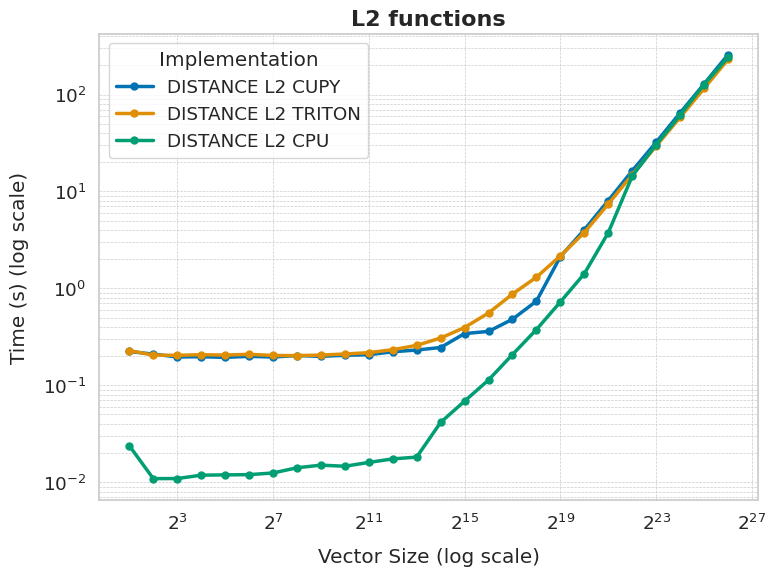

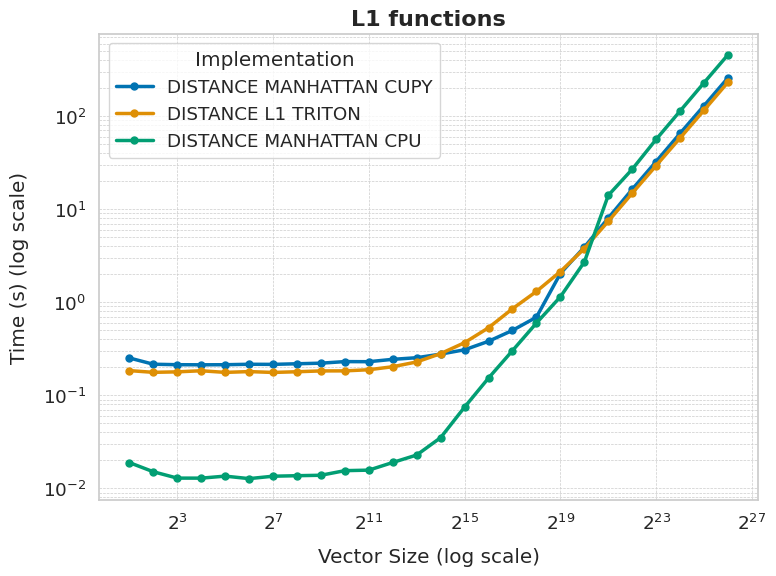

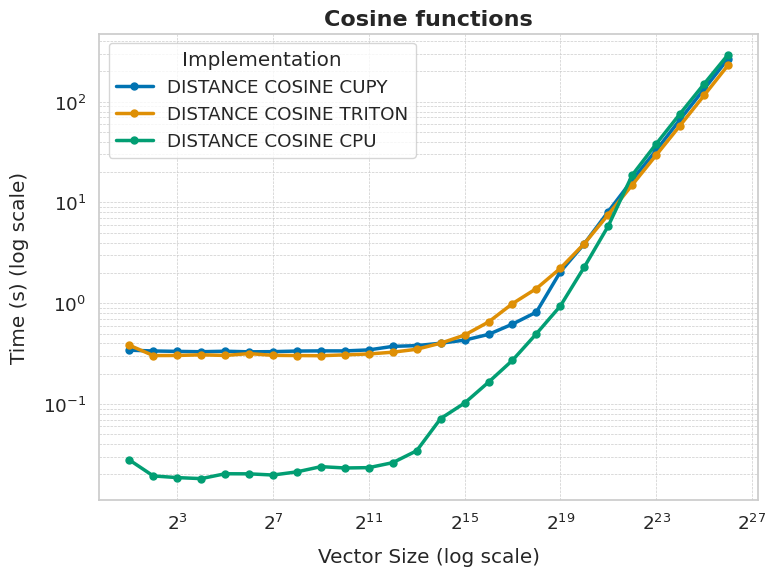

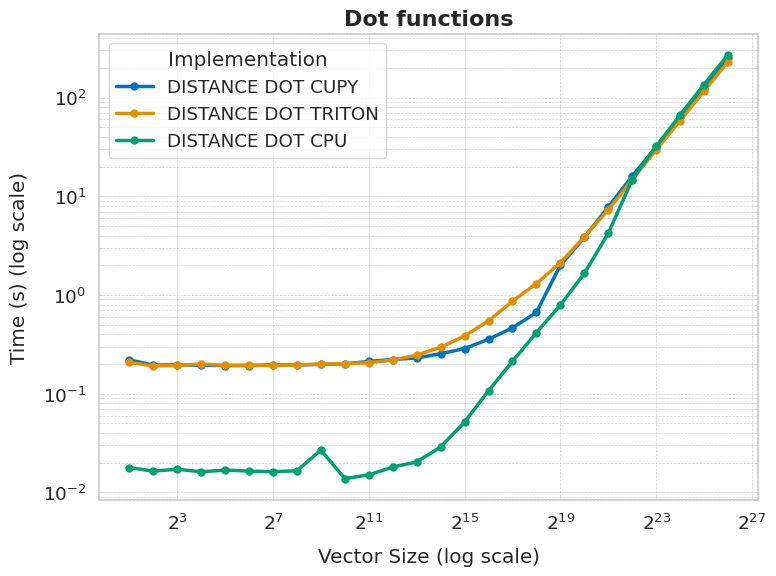

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Set a modern seaborn style
sns.set_theme(style="whitegrid", font_scale=1.2)

# Optional: use a specific color palette
colors = sns.color_palette("colorblind")  # good for accessibility

def plot_results(results_list):
    for idx, (function_type, function_list) in enumerate(results_list.items()):
        plt.figure(figsize=(8, 6))  # bigger, cleaner layout

        color_idx = 0
        for function in function_list:
            for function_name, result in function.items():
                plt.plot(
                    vector_sizes,
                    result,
                    label=function_name.replace('_', ' ').upper(),
                    color=colors[color_idx % len(colors)],
                    linewidth=2.5,
                    marker='o',
                    markersize=5,
                )
                color_idx += 1

        plt.xscale('log', base=2)
        plt.yscale('log')

        # Log ticks with base-2 labels
        plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"$2^{{{int(np.log2(x))}}}$"))

        plt.xlabel("Vector Size (log scale)", labelpad=10)
        plt.ylabel("Time (s) (log scale)", labelpad=10)
        plt.title(function_type, fontsize=16, weight="bold")

        plt.legend(title="Implementation", loc="best", frameon=True)
        plt.tight_layout()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.show()
plot_results(results_list)